Classification of Burn depth 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
import sys

from pathlib import Path
from fastai.vision import *
from fastai.callbacks import *
from google.colab import drive
from fastai import *
from torch import cuda

In [3]:
drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/gdrive/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
!ls

burn-tv-cur.zip  drive	sample_data


In [7]:
!unzip /content/burn-tv-cur.zip  # Unzip file

Archive:  /content/burn-tv-cur.zip
   creating: burn-tv-cur/
   creating: burn-tv-cur/valid/
   creating: burn-tv-cur/valid/Second degree burn/
  inflating: burn-tv-cur/valid/Second degree burn/diabetes-metabolism-bilateral-feet-5-373-g001.png.jpg  
   creating: __MACOSX/
   creating: __MACOSX/burn-tv-cur/
   creating: __MACOSX/burn-tv-cur/valid/
   creating: __MACOSX/burn-tv-cur/valid/Second degree burn/
  inflating: __MACOSX/burn-tv-cur/valid/Second degree burn/._diabetes-metabolism-bilateral-feet-5-373-g001.png.jpg  
  inflating: burn-tv-cur/valid/Second degree burn/medium_2018-01-22-f16df7d0c0.jpg.jpg  
  inflating: __MACOSX/burn-tv-cur/valid/Second degree burn/._medium_2018-01-22-f16df7d0c0.jpg.jpg  
  inflating: burn-tv-cur/valid/Second degree burn/second-degree-burn-on-woman-hand-finger-with-aloe-vera-gel-treatment-picture-id950489498.jpg.jpg  
  inflating: __MACOSX/burn-tv-cur/valid/Second degree burn/._second-degree-burn-on-woman-hand-finger-with-aloe-vera-gel-treatment-pictur

In [8]:
!ls

burn-tv-cur  burn-tv-cur.zip  drive  __MACOSX  sample_data


In [0]:
PATH = "/content/burn-tv-cur" # Setting PATH to burn-tv-cur


In [12]:
path = Path('/content/burn-tv-cur/train')
path.ls()

[PosixPath('/content/burn-tv-cur/train/Second degree burn'),
 PosixPath('/content/burn-tv-cur/train/.DS_Store'),
 PosixPath('/content/burn-tv-cur/train/First degree burn'),
 PosixPath('/content/burn-tv-cur/train/Third degree burn')]

In [0]:
tfms = get_transforms(flip_vert=True)

In [0]:
data64 = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=64).normalize(imagenet_stats)
data128 = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=128).normalize(imagenet_stats)
data256 = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=256).normalize(imagenet_stats)

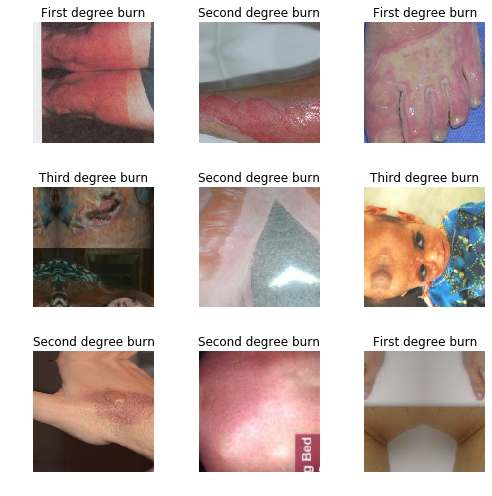

In [15]:
data256.show_batch(rows=3, figsize=(7, 7))


In [16]:
print(data64.classes)

['First degree burn', 'Second degree burn', 'Third degree burn']
